<a href="https://colab.research.google.com/github/Ori226/EEG_VAE/blob/master/reproduce_simple_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np


In [0]:
np.random.seed(42)
def genrate_single_sample(max_length=10):
  binary_vecotr_selection =np.zeros(max_length,dtype=np.bool)
  
  binary_vecotr_selection[np.random.choice(np.arange(max_length),size=2,replace=False)] = 1
  continues_vector = np.random.rand(10)
  final_answer = continues_vector[[binary_vecotr_selection]].sum()
  return binary_vecotr_selection, continues_vector ,final_answer


def generate_multiple_samples(number_of_samples):
  bianries_vectors = []
  continues_vectors = [] 
  final_answers = []
  
  for i in range(number_of_samples):
    binary_vecotr_selection, continues_vector ,final_answer = genrate_single_sample()
    bianries_vectors.append(binary_vecotr_selection)
    continues_vectors.append(continues_vector)
    final_answers.append(final_answer)
  return bianries_vectors, continues_vectors, final_answers
    
    
    
    
  


In [3]:
bianries_vectors, continues_vectors, final_answers = generate_multiple_samples(number_of_samples=1000)
X = np.stack([np.vstack([c_v, b_v]).T for c_v, b_v  in zip(continues_vectors, bianries_vectors)])
y = np.stack(final_answers)
print("X shape:",X.shape, " y shape: ",y.shape)


X shape: (1000, 10, 2)  y shape:  (1000,)


In [4]:
# transfrom the 3 list into <X,y> list
generate_multiple_samples(number_of_samples=30)

([array([ True, False, False,  True, False, False, False, False, False,
         False]),
  array([False, False,  True, False, False, False, False,  True, False,
         False]),
  array([False, False, False,  True, False, False, False,  True, False,
         False]),
  array([ True, False, False, False, False, False, False, False,  True,
         False]),
  array([ True, False,  True, False, False, False, False, False, False,
         False]),
  array([ True, False,  True, False, False, False, False, False, False,
         False]),
  array([ True, False, False, False, False, False, False, False, False,
          True]),
  array([False, False, False, False,  True, False,  True, False, False,
         False]),
  array([False, False, False, False,  True, False,  True, False, False,
         False]),
  array([ True, False, False, False,  True, False, False, False, False,
         False]),
  array([False, False, False,  True, False, False,  True, False, False,
         False]),
  array([ 

In [5]:
# first attemp: build a simple feed forward network


import keras
from keras import Input
from keras import Model
from keras.layers import Dense, Activation,Flatten
max_timestamp = 10
input_layer = Input(shape=(max_timestamp,2))
x = Flatten()(input_layer)
x = Dense(128)(x)
x = Activation(activation='relu')(x)
x = Dense(64)(x)
x = Activation(activation='relu')(x)
x = Dense(1)(x)
x = Activation(activation='relu')(x)
model = Model(input_layer, x)
model.compile(loss='mse',optimizer='rmsprop')

model.fit(X,y, verbose=1,epochs=30)



Using TensorFlow backend.


Epoch 1/30
1000/1000 [==============================] - 1s 581us/step - loss: 0.6610
Epoch 2/30
1000/1000 [==============================] - 0s 53us/step - loss: 0.1461
Epoch 3/30
1000/1000 [==============================] - 0s 51us/step - loss: 0.1205
Epoch 4/30
1000/1000 [==============================] - 0s 46us/step - loss: 0.0998
Epoch 5/30
1000/1000 [==============================] - 0s 50us/step - loss: 0.0791
Epoch 6/30
1000/1000 [==============================] - 0s 45us/step - loss: 0.0671
Epoch 7/30
1000/1000 [==============================] - 0s 54us/step - loss: 0.0583
Epoch 8/30
1000/1000 [==============================] - 0s 48us/step - loss: 0.0456
Epoch 9/30
1000/1000 [==============================] - 0s 48us/step - loss: 0.0380
Epoch 10/30
1000/1000 [==============================] - 0s 60us/step - loss: 0.0338
Epoch 11/30
1000/1000 [==============================] - 0s 55us/step - loss: 0.0321
Epoch 12/30
1000/1000 [==============================] - 0s 50us/step - l

the inpute will be in the form of:
(batch_size, timesteps, input_dim) => (samples, timesteps, input_dim=2)

In [0]:


test_bianries_vectors, test_continues_vectors, test_final_answers = generate_multiple_samples(number_of_samples=30)
X_test = np.stack([np.vstack([c_v, b_v]).T for c_v, b_v  in zip(test_continues_vectors, test_bianries_vectors)])
y_test = np.stack(test_final_answers)

In [0]:
prediction_res_on_test = model.predict(X_test)

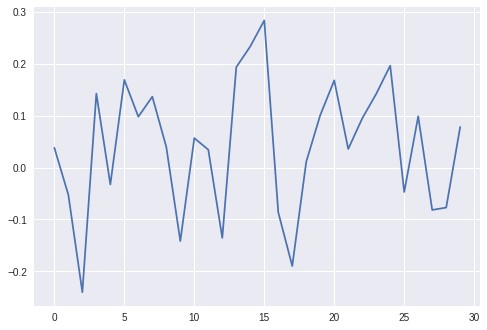

In [14]:
import matplotlib.pyplot as plt

plt.plot(y_test-  prediction_res_on_test.flatten())